<a href="https://colab.research.google.com/github/pranjalchaubey/Deep-Learning-Notes/blob/master/PyTorch%20Image%20Classification%20in%202020/Image_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using PyTorch in 2020  

In this notebook we will be utilizing some of the latest advancements in the  
[PyTorch Ecosystem](https://pytorch.org/ecosystem/) to build a simple image classifier using CNNs.   

Along the way, we will learn some PyTorch and CNN (Convolution Neural  
Networks) basics. 

### 1. Get the Dataset Onboard

In any Machine Learning/Data Science problem, the first step is always to get  
the dataset.  

In our case, to get things started, we will initially use the simple [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database).  
MNIST is largely considered the _'Hello World!'_ of AI/ML. The dataset was  
created way back in the late 90s. The [official description](http://yann.lecun.com/exdb/mnist/) states,  

_"The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image._  

_It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting."_  

<br/>You might be wondering, how to get this dataset in our Colab Workspace?  
PyTorch comes with a _datasets_ module called, [Torchvision.Datasets](https://pytorch.org/docs/stable/torchvision/datasets.html).  
Torchvision.Datasets module contains a number of publically available datasets  
including the one we are looking for, MNIST. You are encouraged to explore the  
Torchvision.Datasets documentation page. 

In [0]:
# Lets import some libraries 
import torch # PyTorch 
from torchvision import datasets # Datasets module 
import torchvision.transforms as transforms # Image Transforms 
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 

In [0]:
# The Data Science Regulars
import numpy as np 
import pandas as pd

Checking out the torchvision.datasets module documentation, we find  
![Torchvision.Dataset](https://drive.google.com/uc?id=1Zsgc5_PnO9BQQ5wqssf67A5Ge-qIXtLh)



In [3]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!





### 2. Train Validation Test Split 

Once the download is complete (usually instantaneous), you should be able to  
see the MNIST dataset downloaded inside the _'data'_ folder on the left hand  
side. (Click on the _Files_ icon on the left sidebar)  

We have both the training and the test sets. Now we need to bifurcate the   
training set in two parts,  
1. Training Set (80% images)
2. Validation Set (20% images)  

The algorithm we use to do this is quite simple,  
1. Create a list of indices of the training data 
2. Randomly Shuffle those indices 
3. Slice the indices in 80-20 split 

[Why create a _Validation Set_ at all?](https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set) 

In [4]:
# obtain training indices that will be used for validation

# 1. Create a list of indices of the training data  
num_train = len(train_data)
print('num_train = len(train_data) ==> ', num_train)
indices = list(range(num_train))
print('len(indices) ==>', len(indices))
# print(indices)

num_train = len(train_data) ==>  60000
len(indices) ==> 60000


In [0]:
# 2. Randomly Shuffle those indices
np.random.shuffle(indices)

In [6]:
# 3. Slice the indices in 80-20 split
# percentage of training set to use as validation
valid_size = 0.2 # ie Train Set divided into two parts 
                 # 80% Train 20% Validation 
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

print('len(train_idx) ==> ', len(train_idx))
print('len(valid_idx) ==> ', len(valid_idx))

len(train_idx) ==>  48000
len(valid_idx) ==>  12000


Please Note that so far we have just been fiddling around with the _'indices'_,  
not the actual images as such.....but Why?  
Answer below.  

### 3. Prepare the Dataloaders 

By now, we have downloaded the dataset, and created a train/valid/test split.  
Q: How do we _'push'_ this data into a PyTorch model?  
A: PyTorch has a mechanism to _'ingest'_ data from a dataset through a module  
known as `DataLoader`.  

A great analogy,  
![DataLoader](https://drive.google.com/uc?id=1U4IG-5lbFGQQS4xwQPU2QiYdR1hFGBZ5)

[Great tutorial on DataLoaders.](https://www.journaldev.com/36576/pytorch-dataloader)  
[Ultimate tutorial on DataLoaders.](https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel) 

Time to prepare the _DataLoaders_ now!  

![DataLoader Documentation](https://drive.google.com/uc?id=1YFbWIGwNlL5Kp4Zvt52Ck0_Wk4MNfxS9)

In [0]:
# define samplers for obtaining training and validation batches
# remember train_idx and valid_idx were the indices that we shuffled above
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare dataloaders
# number of subprocesses to use for data loading
num_workers = 0 # do not modify 
# how many samples per batch to load
batch_size = 20 # ie 20 images per batch 

# Training Set 
train_loader = torch.utils.data.DataLoader(dataset=train_data, \
                                           batch_size=batch_size, \
                                           sampler=train_sampler, \
                                           num_workers=num_workers)
# Validation Set 
valid_loader = torch.utils.data.DataLoader(dataset=train_data, \
                                           batch_size=batch_size, \
                                           sampler=valid_sampler, \
                                           num_workers=num_workers)
# Test Set 
# Notice we have not used a 'sampler' here as it was not required 
test_loader = torch.utils.data.DataLoader(dataset=test_data, \
                                          batch_size=batch_size, \
                                          num_workers=num_workers)

We got the dataloaders working, but how do we know that they are working indeed?  
Visualizing the data from the dataloaders would be a good check! 

In [21]:
# Visualize a whole batch of data from the dataloaders 

dataiter = iter(train_loader) # Get the whole batch 
images, labels = dataiter.next() # Extract the images and their labels 
print(len(images), len(labels)) # Should be equal to the batch size, 20
print('Correct Labels: ', labels)
images = images.numpy() # Convert the images to numpy array for matplotlib

20 20
Correct Labels:  tensor([9, 3, 3, 8, 4, 8, 4, 1, 6, 7, 7, 1, 5, 3, 9, 5, 9, 4, 0, 8])


In [0]:
import matplotlib.pyplot as plt 
# Plots are plotted inside the notebooks, 'inline'
%matplotlib inline 

With matplotlib, always remember that _figures contain axes which in turn   
contain the plots_.  
![Real Python](https://drive.google.com/uc?id=1KdlAGoCK8Lj9pFkrZf52oqOJK3sH3JuH)  

[Great tutorial on Matplotlib.](https://realpython.com/python-matplotlib-guide/)

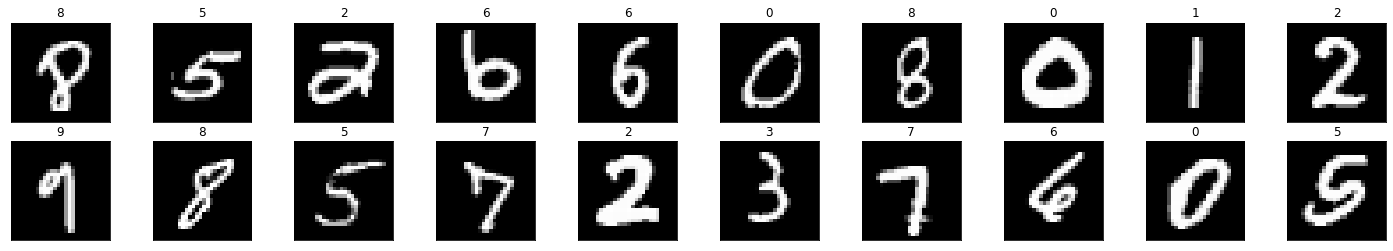

In [20]:
# Plot the whole batch 
fig = plt.figure(figsize=(25, 4))
# Loop over all the images in the batch(20)
for idx in np.arange(20):
    # Add a subplot for the image 
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # Populate the subplot with the image 
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

Our dataloaders seem to be working fine and out data looks great!  
<br/> 
Time to build our CNN based image classification model in PyTorch.....in 2020! 